### Visualize model progression

In [1]:
import coremlv2 as core
import importlib
importlib.reload(core)
import matplotlib.pyplot as plt

In [2]:
ROOT_PATH = './'
kt_iters = ['32','33','34']
metrics = ['loss','accuracy','val_loss','val_accuracy']
best_models = []
for kt_iter in kt_iters:
    base_path = core.os.path.join(ROOT_PATH, 'models/kt/', f'v{kt_iter}/')
    model_source_path = core.os.path.join(base_path, 'wsd/')
    best_models.append(core.best_model_metadata(model_source_path, metrics=metrics, primary_metrics='val_loss', ascending=True, return_best_model_only=False))

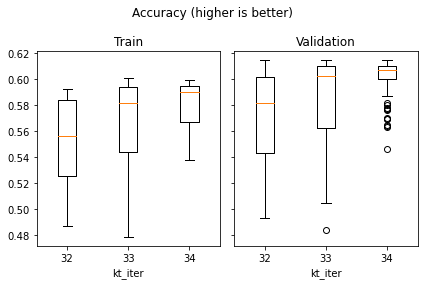

kt_iter   : ['32', '33', '34']
train     : [0.5530476013819376, 0.569099485874176, 0.5823082784075796]
validation: [0.5716524541378021, 0.585257480541865, 0.6013398428022125]


In [3]:
train = [best_model['accuracy'].values for best_model in best_models]
validation = [best_model['val_accuracy'].values for best_model in best_models]

fig, ax = plt.subplots(1, 2, sharey='row')
ax[0].boxplot(train)
ax[0].set_title('Train')
ax[0].set_xticklabels(kt_iters)
ax[0].set_xlabel('kt_iter')
ax[1].boxplot(validation)
ax[1].set_title('Validation')
ax[1].set_xticklabels(kt_iters)
ax[1].set_xlabel('kt_iter')
fig.suptitle('Accuracy (higher is better)')
plt.tight_layout()
plt.show()
print('kt_iter   :', kt_iters)
print('train     :', [values.mean() for values in train])
print('validation:', [values.mean() for values in validation])

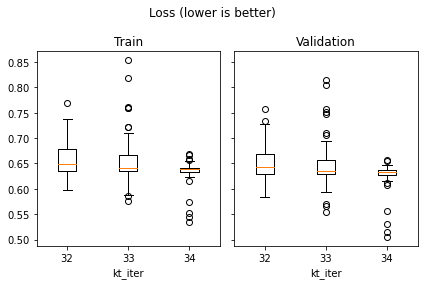

kt_iter   : ['32', '33', '34']
train     : [0.6614859382311503, 0.6540465427769555, 0.6344983474707898]
validation: [0.6535740971565247, 0.6458096424738566, 0.6267338012471612]


In [4]:
train = [best_model['loss'].values for best_model in best_models]
validation = [best_model['val_loss'].values for best_model in best_models]

fig, ax = plt.subplots(1, 2, sharey='row')
ax[0].boxplot(train)
ax[0].set_title('Train')
ax[0].set_xticklabels(kt_iters)
ax[0].set_xlabel('kt_iter')
ax[1].boxplot(validation)
ax[1].set_title('Validation')
ax[1].set_xticklabels(kt_iters)
ax[1].set_xlabel('kt_iter')
fig.suptitle('Loss (lower is better)')
plt.tight_layout()
plt.show()
print('kt_iter   :', kt_iters)
print('train     :', [values.mean() for values in train])
print('validation:', [values.mean() for values in validation])

#### Current best model

In [6]:
for i, best_model in enumerate(best_models):
    print('kt_iter:', kt_iters[i], f'{metrics}\n', best_model.sort_values(by='val_loss').values[0][1:], '\n')

kt_iter: 32 ['loss', 'accuracy', 'val_loss', 'val_accuracy']
 [0.5981650352478027 0.5927723050117493 0.5836413502693176
 0.6056686043739319
 {'lr': 0.00032710419889608736, 'r_units': 112, 'd_units_1': 96, 'd_units_2': 112, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}] 

kt_iter: 33 ['loss', 'accuracy', 'val_loss', 'val_accuracy']
 [0.5764259099960327 0.5924665331840515 0.5548141002655029
 0.599500298500061
 {'lr': 0.00024877369220755786, 'r_units': 112, 'd_units_1': 112, 'd_units_2': 96, 'tuner/epochs': 40, 'tuner/initial_epoch': 14, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': 'c1cdea5ea2337a953dc85061d09a73ba'}] 

kt_iter: 34 ['loss', 'accuracy', 'val_loss', 'val_accuracy']
 [0.5341381430625916 0.5902796387672424 0.5051044821739197
 0.6134005784988403
 {'lr': 0.00024057504258742833, 'r_units_1': 128, 'r_units_2': 96, 'd_units_1': 48, 'd_units_2': 96, 'tuner/epochs': 40, 'tuner/initial_epoch': 14, 'tuner/bracket': 2, 'tuner/round': 2, 

#### Analysis

Sampai kt_iter 34
- Model masih undefit dari accuracy & loss
- Penurunan loss tidak se signifikan accuracy (median value)
- Meskipun median accuracy naik cukup signifikan, upper valuenya stagnan
- Value range semakin sempit pada kt_iter 34 (lebih stabil)
- Best val loss terus berkurang signifikan
- Saran: tambahkan epoch, tambahkan 1 layer tapi dibuat bypass layer
- coba retrain kt_iter 34 sampai 300 epoch terus save